# Data

Dataset is obtained from a B2C model. This means that the clients are individual people rather than firms or institutions.This comes from a fast moving consumer goods or FMCG sector.

Purchase Data (**Purchase_data**)
1. Each observation is a transaction rather than a customer. Therefore different observations can be related to the same customer.
2. The entire dataset consist purchase of only one product type.
3. The segementation dataset features are merged in this dataset. 

# Reading Data

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Data Import**

In [ ]:
df_pur=pd.read_csv('Purchase_data.csv')
df_pur.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [ ]:
df_pur.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

No missing values as dataset is already being pre-processed properly.

# Data Segmentation

**Importing Model**

In [ ]:
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

**Standardization**

In [ ]:
features = df_pur[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_pur_seg_std = scaler.transform(features)

**PCA**

In [ ]:
df_pur_seg_pca = pca.transform(df_pur_seg_std)

**K-means PCA**

In [ ]:
pur_seg_kmeans_pca = kmeans_pca.predict(df_pur_seg_pca)

In [ ]:
# Creating new master dataframe
df_pur_predictors = df_pur.copy()

In [ ]:
df_pur_predictors['Segment'] = pur_seg_kmeans_pca

# Descriptive Analysis by Segments

In [ ]:
df_pur_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


**Feature Engineering**

In [ ]:
#Purchase occasions by ID (individuals)
flag1 = df_pur_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).count()
flag1 = flag1.set_index('ID')
flag1 = flag1.rename(columns={'Incidence' : 'Number of Visits'})
flag1.head()

,Number of Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [ ]:
#Purchases per ID
flag2 = df_pur_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).sum()
flag2 = flag2.set_index('ID')
flag2 = flag2.rename(columns={'Incidence' : 'Number of Purchases'})
flag3 = flag1.join(flag2)
flag3.head()

,Number of Visits,Number of Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [ ]:
# Average number of purchases
flag3['Average Number of Purchases'] = flag3['Number of Purchases'] / flag3['Number of Visits']
flag3.head()

,Number of Visits,Number of Purchases,Average Number of Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [ ]:
# Indexing customers by segments
flag4 = df_pur_predictors[['ID','Segment']].groupby(['ID'], as_index = False).mean()
flag4 = flag4.set_index('ID')
df_pur_des = flag3.join(flag4)
df_pur_des.head()

,Number of Visits,Number of Purchases,Average Number of Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


In [ ]:
#Segment Proportions 

seg_prop = df_pur_des[['Number of Purchases','Segment']].groupby(['Segment']).count() / df_pur_des.shape[0]
seg_prop = seg_prop.rename(columns = {'Number of Purchases' : 'Segment Proportions'})
seg_prop.head()

,Segment Proportions
Segment,
0.0,0.188
1.0,0.210
2.0,0.406
3.0,0.196


Text(0.5, 1.0, 'Segment Proportions')

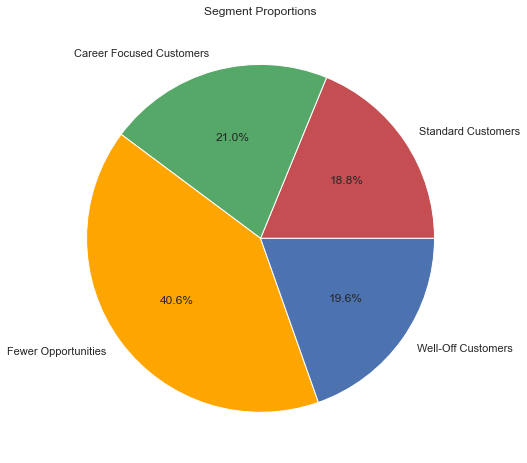

In [ ]:
# Visualization
plt.figure(figsize= (12,8))
# Addition of Labels
plt.pie(seg_prop['Segment Proportions'],
        labels = ['Standard Customers', 'Career Focused Customers','Fewer Opportunities','Well-Off Customers'],
        autopct = '%1.1f%%',
        colors = ('r','g','orange','b'))

plt.title('Segment Proportions')

The Fewer Opportunities segment is the largest with 40.6 percent followed by Career Focused Customers with 21 percent. The Standard Customers segment is smallest with 18.8 percent.

# Purchase Occasion and Purchase Incidence

In [ ]:
seg_mean = df_pur_des.groupby(['Segment']).mean()
seg_std = df_pur_des.groupby(['Segment']).std()
seg_mean

,Number of Visits,Number of Purchases,Average Number of Purchases
Segment,,,
0.0,117.531915,23.734043,0.205481
1.0,124.428571,41.847619,0.294155
2.0,113.719212,22.768473,0.201751
3.0,117.295918,34.602041,0.284478


Text(0.5, 1.0, 'Average number of store visits by Segment')

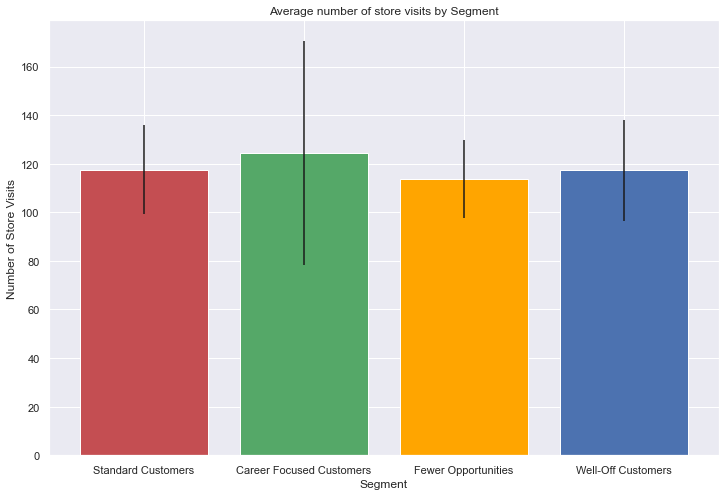

In [ ]:
plt.figure(figsize = (12,8))
plt.bar(x=(0,1,2,3),
        tick_label = ('Standard Customers', 'Career Focused Customers','Fewer Opportunities','Well-Off Customers'),
        height = seg_mean['Number of Visits'],
        yerr = seg_std['Number of Visits'],
        color = ('r','g','orange','b'))

plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average number of store visits by Segment')



*   The height of each bar represents the mean store visits.

*   The vertical line indicates the dispersion of the data points or how big the standard deviation is.

1. The Fewer Opportunities segment visits the store least often while the Career Focused Customers visits the most.
2. The standard deviation of Career Focused Customers are hugh. It implies that customers in this segment are least homogeneous means they are least alike on how often the visits are to the store.
3. The Standard Customers, Fewer Opportunities and Well-Off Customers are very similar in terms of their average number of store visits.



Text(0.5, 1.0, 'Number of Purchases by Segment')

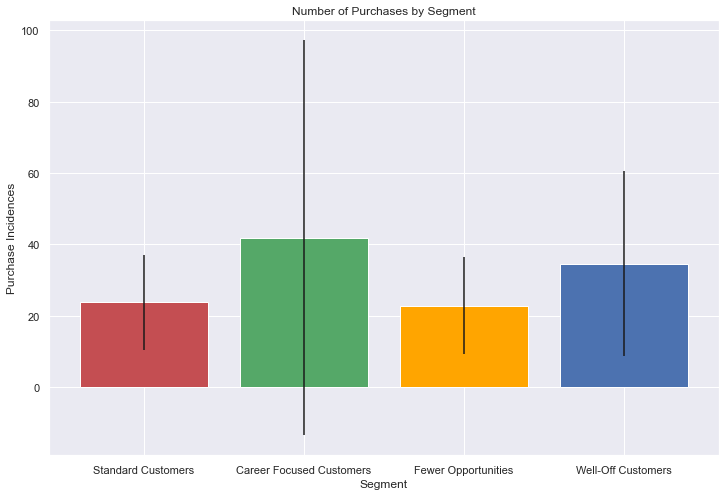

In [ ]:
plt.figure(figsize = (12,8))
plt.bar(x=(0,1,2,3),
        tick_label = ('Standard Customers', 'Career Focused Customers','Fewer Opportunities','Well-Off Customers'),
        height = seg_mean['Number of Purchases'],
        yerr = seg_std['Number of Purchases'],
        color = ('r','g','orange','b'))

plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')



*   The Career Focused Customers buys products more often but have high standard deviation means a part of this segment buys a product very frequently.
*   The Fewer Opportunities segment appears to be most homogeneous.



Text(0.5, 1.0, 'Average Number of Purchases by Segment')

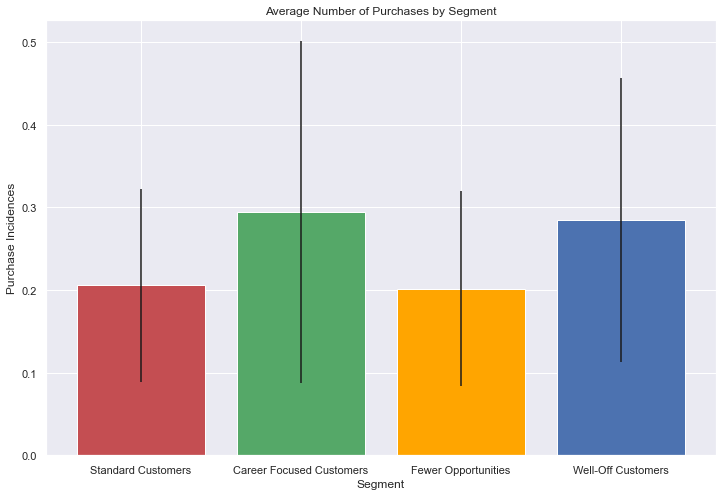

In [ ]:
plt.figure(figsize = (12,8))
plt.bar(x=(0,1,2,3),
        tick_label = ('Standard Customers', 'Career Focused Customers','Fewer Opportunities','Well-Off Customers'),
        height = seg_mean['Average Number of Purchases'],
        yerr = seg_std['Average Number of Purchases'],
        color = ('r','g','orange','b'))

plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')



*   The Career Focused Customers again have high standard deviation in average number of purchases.
*   The Standard Customers and Fewer Opportunities are very similar in their average number of purchases.



# Brand Choice

In [ ]:
# Taking cases where incidence is equal to 1 as only those are relevant for brand

df_pur_incidence = df_pur_predictors[df_pur_predictors['Incidence'] == 1]

# Creation of new dataframe and providing dummies to brands
br_dumm = pd.get_dummies(df_pur_incidence['Brand'], prefix = 'Brand', prefix_sep = '-')
br_dumm['Segment'], br_dumm['ID'] = df_pur_incidence['Segment'], df_pur_incidence['ID']
br_dumm

,Brand-1,Brand-2,Brand-3,Brand-4,Brand-5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [ ]:
# Temporary variable to store the groups by ID and taking the brand mean
flag = br_dumm.groupby(['ID'], as_index = True).mean()
mean_br_choice = flag.groupby(['Segment'], as_index = True).mean()

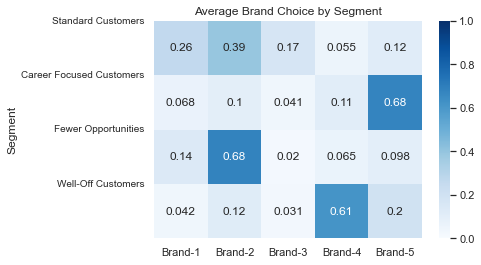

In [ ]:
# Visualization
sns.heatmap(mean_br_choice,
            vmin=0,
            vmax=1,
            cmap='Blues',
            annot = True)

plt.yticks([0,1,2,3],['Standard Customers', 'Career Focused Customers','Fewer Opportunities','Well-Off Customers'],rotation=0, fontsize=10)
plt.title('Average Brand Choice by Segment')
plt.show()

Five brands are arranged in ascending order of price and each number shows the average proportion of brand choices for each segment.

*   The Standard Customers have stronger preference for Brand-2 and weaker preference for Brand-1, Brand-3 and Brand-5. This indicates that they don't go for any brand name adn they can be influenced to try out different brands.
*   68 percent of Career Focused Customers buys the most expensive brand. It can be safely assumed that they are looking for some kind of luxury status and this opportunity can be utilised by further increasing the price of Brand-5.
*   68 percent of Fewer Opportunities buys Brand-2. It is certainly not the cheapest brand available hence this shows the loyalty of this cluster towards this specific brand. This cluster can be controlled by promotions over Brand-2 due to their faith in the brand.
*   Similarly, 61 percent of Well-Off Customers buys Brand-4 but they don't show same confidence in buying Brand-5, hence implicating their loyalty towards Brand-4. This cluster can be controlled by promotions over Brand-4 due to their faith in the brand.





# Brand-Wise Store Revenue

In [ ]:
# Revenue by each brand

flag1 = df_pur_predictors[df_pur_predictors['Brand'] == 1]
flag1.loc[:,'Revenue of Brand-1'] = flag1['Price_1'] * flag1['Quantity']
seg_br_rev = pd.DataFrame()
seg_br_rev[['Segment','Revenue of Brand-1']] = flag1[['Segment','Revenue of Brand-1']].groupby(['Segment'], as_index = False).sum()

flag2 = df_pur_predictors[df_pur_predictors['Brand'] == 2]
flag2.loc[:,'Revenue of Brand-2'] = flag2['Price_2'] * flag2['Quantity']
seg_br_rev[['Segment','Revenue of Brand-2']] = flag2[['Segment','Revenue of Brand-2']].groupby(['Segment'], as_index = False).sum()

flag3 = df_pur_predictors[df_pur_predictors['Brand'] == 3]
flag3.loc[:,'Revenue of Brand-3'] = flag3['Price_2'] * flag3['Quantity']
seg_br_rev[['Segment','Revenue of Brand-3']] = flag3[['Segment','Revenue of Brand-3']].groupby(['Segment'], as_index = False).sum()

flag4 = df_pur_predictors[df_pur_predictors['Brand'] == 4]
flag4.loc[:,'Revenue of Brand-4'] = flag4['Price_2'] * flag4['Quantity']
seg_br_rev[['Segment','Revenue of Brand-4']] = flag4[['Segment','Revenue of Brand-4']].groupby(['Segment'], as_index = False).sum()

flag5 = df_pur_predictors[df_pur_predictors['Brand'] == 5]
flag5.loc[:,'Revenue of Brand-5'] = flag5['Price_5'] * flag5['Quantity']
seg_br_rev[['Segment','Revenue of Brand-5']] = flag5[['Segment','Revenue of Brand-5']].groupby(['Segment'], as_index = False).sum()

# Creation of new feature total revenue by segment
seg_br_rev['Total Revenue'] = (seg_br_rev['Revenue of Brand-1'] +
                               seg_br_rev['Revenue of Brand-2'] +
                               seg_br_rev['Revenue of Brand-3'] +
                               seg_br_rev['Revenue of Brand-4'] +
                               seg_br_rev['Revenue of Brand-5'] )

seg_br_rev

,Segment,Revenue of Brand-1,Revenue of Brand-2,Revenue of Brand-3,Revenue of Brand-4,Revenue of Brand-5,Total Revenue
0,0,2531.85,4147.86,3494.16,533.07,1479.29,12186.23
1,1,664.94,1144.38,572.71,1915.86,20251.43,24549.32
2,2,2409.39,15177.84,648.21,1610.29,2380.59,22226.32
3,3,699.47,1298.23,660.31,11811.07,5509.69,19978.77


In [ ]:
# Creation of new feature Segment Proportions by each segment
seg_br_rev['Segment Proportions'] = seg_prop['Segment Proportions']
seg_br_rev['Segment'] = seg_br_rev['Segment'].map({0:'Standard Customers',
                                                   1:'Career Focused Customers',
                                                   2:'Fewer Opportunities',
                                                   3:'Well-Off Customers'})
seg_br_rev = seg_br_rev.set_index(['Segment'])
seg_br_rev

,Revenue of Brand-1,Revenue of Brand-2,Revenue of Brand-3,Revenue of Brand-4,Revenue of Brand-5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard Customers,2531.85,4147.86,3494.16,533.07,1479.29,12186.23,0.188
Career Focused Customers,664.94,1144.38,572.71,1915.86,20251.43,24549.32,0.210
Fewer Opportunities,2409.39,15177.84,648.21,1610.29,2380.59,22226.32,0.406
Well-Off Customers,699.47,1298.23,660.31,11811.07,5509.69,19978.77,0.196




*   The Career Focused Customers bring the most revenue followed by Fewer Opportunities, Well-Off Customers and Standard Customers respectively.
*   Even though by proportion, Career Focused Customers are second largest they bring the most revenue. The Standard Customers are almost equal in size but they brings less than half that revenue. 
*   The Fewer Opportunities and Well-Off Customers spend around the same amount of money on this product even though the former is twice in size than the latter.



1.  Brand-3 has the lowest revenue compared to other four and it's highest contributor is the Standard Customers segment.
2.   Brand-4 and Brand-2 have loyal segments in terms of Well-off Customers and Fewer Opportunities respectively, and both brands can cautiously increase their price to gain more market share.
3. Brand 5 has a loyal base in Career Focused Customers and they can choose to capture the well-off customers by providing some kind of discount strategy.